# Workshop 1: วิเคราะห์ความรู้สึกจากภาพยนต์ IMDB 1

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense
from keras.datasets import imdb

## โหลดข้อมูลและตรวจสอบเบื้องต้น

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
cls, count = np.unique(y_train, return_counts=True)
print(cls)
print(count)

[0 1]
[12500 12500]


In [ ]:
cls, count = np.unique(y_test, return_counts=True)
print(cls)
print(count)

[0 1]
[12500 12500]


In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join([reverse_index.get(i - 3, "#") for i in X_train[0]])
decoded

1641221/1641221 [==============================] - 0s 0us/step


"# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should b

In [ ]:
data = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

print("Categories:", np.unique(targets))
print("Number of unique words:", len(np.unique(np.hstack(data))))

sents_len = [len(i) for i in data]
print("Average Review length:", np.mean(sents_len))
print("Standard Deviation:", round(np.std(sents_len)))
print("Min length:", np.min(sents_len))
print("Max length:", np.max(sents_len))

Categories: [0 1]
Number of unique words: 88585
Average Review length: 234.75892
Standard Deviation: 173
Min length: 7
Max length: 2494


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(sents_len, columns=['words'])
df.describe().round(2)

,words
count,50000.00
mean,234.76
std,172.91
min,7.00
25%,129.00
50%,176.00
75%,285.00
max,2494.00


array([[<Axes: title={'center': 'words'}>]], dtype=object)

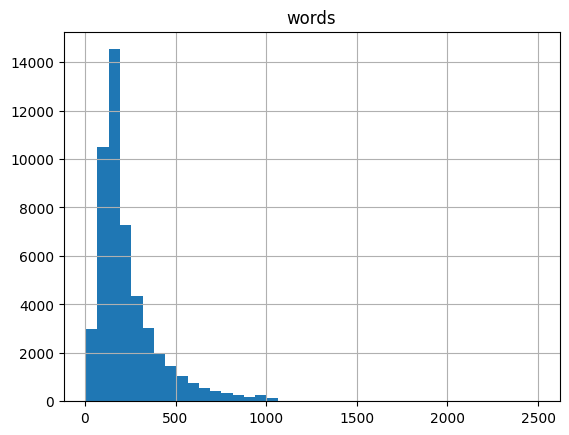

In [ ]:
df.hist(bins=40)

## เตรียมข้อมูล

In [ ]:
max_len = 250

X_train = pad_sequences(X_train, truncating='post', padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, truncating='post', padding='post', maxlen=max_len)

X_train.shape

(25000, 250)

## สร้าง Model

In [ ]:
vocab_len = 90000
embed_size = 100

model = Sequential()
model.add(Embedding(vocab_len, embed_size, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=128, activation='tanh'))
# model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          9000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 9,117,377
Trainable params: 9,117,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 57s 248ms/step - loss: 0.6917 - accuracy: 0.5160 - val_loss: 0.6891 - val_accuracy: 0.5330
Epoch 2/10
196/196 [==============================] - 37s 186ms/step - loss: 0.6042 - accuracy: 0.6939 - val_loss: 0.5759 - val_accuracy: 0.7313
Epoch 3/10
196/196 [==============================] - 28s 144ms/step - loss: 0.5886 - accuracy: 0.6819 - val_loss: 0.7504 - val_accuracy: 0.5553
Epoch 4/10
196/196 [==============================] - 23s 116ms/step - loss: 0.6550 - accuracy: 0.6074 - val_loss: 0.7187 - val_accuracy: 0.5013
Epoch 5/10
196/196 [==============================] - 18s 93ms/step - loss: 0.6578 - accuracy: 0.5772 - val_loss: 0.6970 - val_accuracy: 0.5188
Epoch 6/10
196/196 [==============================] - 15s 78ms/step - loss: 0.6176 - accuracy: 0.6210 - val_loss: 0.6792 - val_accuracy: 0.5693
Epoch 7/10
196/196 [==============================] - 14s 72ms/step - loss: 0.5535 - accuracy: 0.6857 - val_loss: 0.6803 - val_accur

In [ ]:
loss, acurracy = model.evaluate(X_test, y_test)
print("Test accuracy: {:.3f}".format(acurracy))

782/782 [==============================] - 5s 6ms/step - loss: 0.5429 - accuracy: 0.7740
Test accuracy: 0.774


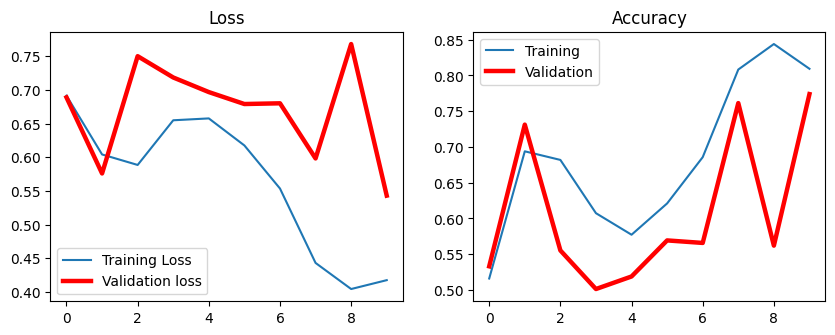

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

# Workshop 2: วิเคราะห์ความรู้สึกจากภาพยนตร์ IMDB csv

In [ ]:
import numpy as np
import pandas as pd
import gensim
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, GRU, LSTM, Dense

In [ ]:
gensim.__version__, np.__version__

('4.3.2', '1.23.5')

In [ ]:
!pip install --upgrade gensim

In [ ]:
!pip install beautifulsoup4

## เตรียม Pre-trained model คำศัพท์

In [ ]:
import gensim.downloader as api

In [ ]:
wv = api.load('glove-wiki-gigaword-300')
wv

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
len(wv.index_to_key)

400000

In [ ]:
wv.vector_size

300

In [ ]:
wv.similar_by_word('horrible')

[('terrible', 0.8621524572372437),
 ('awful', 0.8252272605895996),
 ('dreadful', 0.7546345591545105),
 ('horrendous', 0.7463632225990295),
 ('horrific', 0.7377292513847351),
 ('horrifying', 0.6987590789794922),
 ('ghastly', 0.6675786375999451),
 ('appalling', 0.6425061821937561),
 ('terrifying', 0.6083508729934692),
 ('disgusting', 0.6071469187736511)]

In [ ]:
wv.most_similar('crap', topn=8)

[('shit', 0.5936331152915955),
 ('whack', 0.50784832239151),
 ('baloney', 0.4927889406681061),
 ('stuff', 0.45025062561035156),
 ('fucking', 0.4463122487068176),
 ('craziness', 0.43890807032585144),
 ('freaking', 0.43388476967811584),
 ("'em", 0.4293352961540222)]

## เตรียมข้อมูล

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/12. การวิเคราะห์ความรู้สึก/IMDB Dataset.csv', encoding='utf-8')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['label'] = np.where(df.sentiment == 'positive', 1, 0)
df.sample(10)

,review,sentiment,label
21063,"What a long, drawn-out, pointless movie. I'm s...",negative,0
1522,If you don't mind having your emotions toyed w...,negative,0
43175,"Yes, I had the misfortune of watching this fil...",negative,0
40923,I found this to be a so-so romance/drama that ...,positive,1
3595,I knew it was going to be awful but not this a...,negative,0
37765,The early career of Abe Lincoln is beautifully...,positive,1
24067,What more could anyone want? He's a history le...,positive,1
5646,What on earth has become of our dear Ramu? Is ...,negative,0
24366,"For the knowledgeable Beatles fan, the main va...",negative,0
33769,"What a fine film! Unfortunately, being 1947, t...",positive,1


## ประมวลผลเบื้องต้น

In [ ]:
df['review2'] = df.review.str.lower()
df.iloc[[1, 25319, 19574, 49804]]

,review,sentiment,label,review2
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. <br /><br />the...
25319,WE FAW DOWN <br /><br />Aspect ratio: 1.33:1<b...,negative,0,we faw down <br /><br />aspect ratio: 1.33:1<b...
19574,<br /><br />The play has been heavily edited a...,negative,0,<br /><br />the play has been heavily edited a...
49804,"***May Contain Spoilers*** OK, it wasn't exact...",positive,1,"***may contain spoilers*** ok, it wasn't exact..."


In [ ]:
from bs4 import BeautifulSoup

def remove_tag(x):
  soup = BeautifulSoup(x)
  return soup.get_text()

df['review2'] = df.review2.apply(remove_tag)

<ipython-input-18-4bb66c48845a>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(x)


In [ ]:
from gensim.parsing.preprocessing import remove_stopwords

df['review2'] = df.review2.apply(remove_tag)
tk = Tokenizer()
tk.fit_on_texts(df.review2)
tk.word_index

<ipython-input-18-4bb66c48845a>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(x)


{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'was': 12,
 'as': 13,
 'for': 14,
 'with': 15,
 'movie': 16,
 'but': 17,
 'film': 18,
 'on': 19,
 'not': 20,
 'you': 21,
 'are': 22,
 'his': 23,
 'have': 24,
 'be': 25,
 'one': 26,
 'he': 27,
 'all': 28,
 'at': 29,
 'by': 30,
 'an': 31,
 'they': 32,
 'so': 33,
 'who': 34,
 'from': 35,
 'like': 36,
 'or': 37,
 'just': 38,
 'her': 39,
 'about': 40,
 'out': 41,
 'if': 42,
 "it's": 43,
 'has': 44,
 'there': 45,
 'some': 46,
 'what': 47,
 'good': 48,
 'when': 49,
 'more': 50,
 'very': 51,
 'up': 52,
 'no': 53,
 'time': 54,
 'my': 55,
 'even': 56,
 'would': 57,
 'she': 58,
 'which': 59,
 'only': 60,
 'really': 61,
 'see': 62,
 'story': 63,
 'their': 64,
 'had': 65,
 'can': 66,
 'me': 67,
 'well': 68,
 'were': 69,
 'than': 70,
 'much': 71,
 'we': 72,
 'bad': 73,
 'been': 74,
 'get': 75,
 'do': 76,
 'great': 77,
 'other': 78,
 'will': 79,
 'also': 80,
 'into': 81,
 'people': 82,

In [ ]:
tk.word_index['film']

18

In [ ]:
vocab_size = len(tk.word_index) + 1
vocab_size

126506

In [ ]:
sents_enc = tk.texts_to_sequences(df.review2)
sents_enc[1][:15]

[3, 392, 119, 352, 1, 1384, 2976, 6, 51, 17947, 51, 154, 54, 2383, 1583]

In [ ]:
sents_len = [len(i) for i in sents_enc]

print('Average Review length:', np.mean(sents_len))
print('Standard Deviation:', round(np.std(sents_len)))
print('Min length:', np.min(sents_len))
print('Max length:', np.max(sents_len))

Average Review length: 230.93546
Standard Deviation: 171
Min length: 6
Max length: 2466


## เตรียมข้อมูล

In [ ]:
from os import truncate

max_len = 200
sents_pad = pad_sequences(sents_enc, truncating='post', padding='post', maxlen=max_len)

In [ ]:
check_reviews = sents_pad[:2]
tk.sequences_to_texts(check_reviews)

["one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare forget prett

## การใช้งาน Tokenizer

In [ ]:
import pickle

with open('IMDB_tokenizer.pickle', 'wb') as handle:
  pickle.dump(tk, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('IMDB_tokenizer.pickle', 'rb') as handle:
  tk = pickle.load(handle)

## เตรียมข้อมูล Train และ Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sents_pad, df.label, test_size=.5, random_state=1)
X_train.shape, X_test.shape

((25000, 200), (25000, 200))

In [ ]:
embed_size = wv.vector_size

embedding_matrix = np.zeros((vocab_size, embed_size))
for word, i in tk.word_index.items():
  if i >= vocab_size:
    continue
  try:
    embedding_vector = wv[word]
    embedding_matrix[i] = embedding_vector[:embed_size]
  except KeyError:
    embedding_matrix[i] = np.random.normal(0, np.sqrt(0.25), embed_size)

embedding_matrix.shape

(126506, 300)

In [ ]:
embedding_matrix[1][:25]

array([ 0.04656   ,  0.21318001, -0.0074364 , -0.45853999, -0.035639  ,
        0.23643   , -0.28836   ,  0.21521001, -0.13485999, -1.64129996,
       -0.26091   ,  0.032434  ,  0.056621  , -0.043296  , -0.021672  ,
        0.22476   , -0.075129  , -0.067018  , -0.14247   ,  0.038825  ,
       -0.18951   ,  0.29977   ,  0.39304999,  0.17887001, -0.17343   ])

## สร้าง Model

In [ ]:
from keras.layers import GRU, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, embed_size, weights=[embedding_matrix], trainable=True, input_shape=(X_train.shape[1],)))
model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 300)          37951800  
                                                                 
 bidirectional (Bidirection  (None, 256)               330240    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 38282297 (146.04 MB)
Trainable params: 38282297 (146.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 51s 217ms/step - loss: 0.4981 - accuracy: 0.7508 - val_loss: 0.3347 - val_accuracy: 0.8602
Epoch 2/5
196/196 [==============================] - 29s 148ms/step - loss: 0.2457 - accuracy: 0.9035 - val_loss: 0.2970 - val_accuracy: 0.8810
Epoch 3/5
196/196 [==============================] - 24s 122ms/step - loss: 0.1031 - accuracy: 0.9667 - val_loss: 0.3682 - val_accuracy: 0.8719
Epoch 4/5
196/196 [==============================] - 19s 99ms/step - loss: 0.0316 - accuracy: 0.9906 - val_loss: 0.5233 - val_accuracy: 0.8603
Epoch 5/5
196/196 [==============================] - 18s 95ms/step - loss: 0.0115 - accuracy: 0.9971 - val_loss: 0.6636 - val_accuracy: 0.8400


In [ ]:
loss, acurracy = model.evaluate(X_test, y_test)
print('Test accuracy: {:.3f}'.format(acurracy))

782/782 [==============================] - 5s 7ms/step - loss: 0.6636 - accuracy: 0.8400
Test accuracy: 0.840


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, weights=[embedding_matrix], trainable=False, input_shape=(X_train.shape[1],)))
model.add(Bidirectional(GRU(units=128, activation='tanh')))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 300)          37951800  
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               330240    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 38282297 (146.04 MB)
Trainable params: 330497 (1.26 MB)
Non-trainable params: 37951800 (144.77 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
196/196 [==============================] - 12s 45ms/step - loss: 0.5541 - accuracy: 0.7053 - val_loss: 0.3970 - val_accuracy: 0.8257
Epoch 2/5
196/196 [==============================] - 8s 43ms/step - loss: 0.3673 - accuracy: 0.8407 - val_loss: 0.3442 - val_accuracy: 0.8534
Epoch 3/5
196/196 [==============================] - 8s 42ms/step - loss: 0.3219 - accuracy: 0.8633 - val_loss: 0.3213 - val_accuracy: 0.8644
Epoch 4/5
196/196 [==============================] - 8s 42ms/step - loss: 0.2816 - accuracy: 0.8849 - val_loss: 0.3131 - val_accuracy: 0.8706
Epoch 5/5
196/196 [==============================] - 8s 42ms/step - loss: 0.2359 - accuracy: 0.9048 - val_loss: 0.3151 - val_accuracy: 0.8705


## Predict

In [ ]:
from keras.preprocessing.text import text_to_word_sequence

comment = 'this film was about politics. i do not like it. It sucks. Can i get money back'
works_tk = text_to_word_sequence(comment)
works_tk

['this',
 'film',
 'was',
 'about',
 'politics',
 'i',
 'do',
 'not',
 'like',
 'it',
 'it',
 'sucks',
 'can',
 'i',
 'get',
 'money',
 'back']

In [ ]:
new_words_enc = tk.texts_to_sequences([comment])
new_words_enc

[[10, 18, 12, 40, 2534, 9, 76, 20, 36, 8, 8, 1693, 66, 9, 75, 290, 140]]

In [ ]:
X_new = pad_sequences(new_words_enc, truncating='post', padding='post', maxlen=max_len)
X_new

array([[  10,   18,   12,   40, 2534,    9,   76,   20,   36,    8,    8,
        1693,   66,    9,   75,  290,  140,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
tk.sequences_to_texts(X_new)

['this film was about politics i do not like it it sucks can i get money back']

In [ ]:
result = model.predict(X_new)
print(np.squeeze(result).round(3))
print('Positive' if result[0] > 0.5 else 'Negative')

1/1 [==============================] - 1s 553ms/step
0.575
Positive


In [ ]:
comment2 = 'this film was about politics. people talk about it. the film was good. i recommend'
reviews_new = [comment, comment2]
for i in reviews_new:
  print(i)

this film was about politics. i do not like it. It sucks. Can i get money back
this film was about politics. people talk about it. the film was good. i recommend


In [ ]:
new_words_enc = tk.texts_to_sequences(reviews_new)
X_new = pad_sequences(new_words_enc, truncating='post', padding='post')
maxlen = max_len
results = model.predict(X_new)
print(results.round(3))

1/1 [==============================] - 1s 510ms/step
[[0.713]
 [0.95 ]]


In [ ]:
result = model.predict(X_test[:15])
print(np.squeeze(result).round(2))

1/1 [==============================] - 0s 22ms/step
[0.01 0.01 0.02 0.01 0.71 0.01 0.63 0.   0.01 0.01 0.85 0.99 1.   0.99
 0.  ]


In [ ]:
y_test[:15].tolist()

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]

# Workshop 3: ใช้งาน Transformer Pre-trained Model

In [ ]:
!pip install transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00


## Sentiment analysis

In [ ]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
result = classifier('this film was about politics. sucks')[0]
result

{'label': 'NEGATIVE', 'score': 0.8648415803909302}

In [ ]:
print(f"label: {result['label']} score: {round(result['score'], 3)}")

label: NEGATIVE score: 0.865


## Rating ให้ดาว

In [ ]:
classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
comment1 = 'this film was about politics. you may fall asleep'
comment2 = 'this film was about politics. people like it. but i give 1 star.'
comment3 = 'this film was about politics. you should watch it.'

reviews = [comment1, comment2, comment3]
classifier(reviews)

[{'label': '5 stars', 'score': 0.25946640968322754},
 {'label': '1 star', 'score': 0.9434362649917603},
 {'label': '5 stars', 'score': 0.41365793347358704}]

## การจัดกลุ่ม

In [ ]:
zshot_classifier = pipeline("zero-shot-classification")

content = "With the support of a structured diabetes program, as recommended by international diabetes guidelines, the cost and health impact of the condition..."
candidate_labels = ['business', 'politics', 'technology', 'entertainment', 'medicine']

result = zshot_classifier(content, candidate_labels)
result

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'With the support of a structured diabetes program, as recommended by international diabetes guidelines, the cost and health impact of the condition...',
 'labels': ['medicine', 'technology', 'business', 'politics', 'entertainment'],
 'scores': [0.8780441880226135,
  0.042823538184165955,
  0.034783296287059784,
  0.025501005351543427,
  0.01884794794023037]}

# Workshop 4: Transformer และ BERT

In [1]:
!pip install ktrain -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 66.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 54.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 122.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 44.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/12. การวิเคราะห์ความรู้สึก/IMDB Dataset.csv', encoding='utf-8')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
_, class_names = pd.factorize(df.sentiment)
class_names.to_list()

['positive', 'negative']

## เตรียมข้อมูล Train และ Test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.review, df.sentiment, test_size=.5, random_state=1)
X_train.shape, y_train.shape

((25000,), (25000,))

In [6]:
pretrain_model = 'distilbert-base-uncased'
transformer = text.Transformer(pretrain_model, maxlen=400, classes=class_names.to_list())
train = transformer.preprocess_train(X_train.to_list(), y_train.to_list())
test = transformer.preprocess_test(X_test.to_list(), y_test.to_list())

/usr/local/lib/python3.10/dist-packages/ktrain/text/preprocessor.py:382: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn(


preprocessing train...
language: en
train sequence lengths:
	mean : 232
	95percentile : 593
	99percentile : 904


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 230
	95percentile : 586
	99percentile : 908


In [7]:
train.x.shape, train.y.shape

((25000, 3, 400), (25000, 2))

In [9]:
train.x[0]

array([[ 101, 1045, 2572, ...,    0,    0,    0],
       [   1,    1,    1, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

## สร้าง Model

In [ ]:
model = transformer.get_classifier()
model.summary()

Model: "tf_distil_bert_for_sequence_classification_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMa  multiple                  66362880  
 inLayer)                                                        
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_59 (Dropout)        multiple                  0         
                                                                 
Total params: 66955010 (255.41 MB)
Trainable params: 66955010 (255.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train

In [ ]:
learner = ktrain.get_learner(model, train_data=train, val_data=test, batch_size=16)
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1562/1562 [==============================] - 981s 619ms/step - loss: 26.4713 - accuracy: 0.6245


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


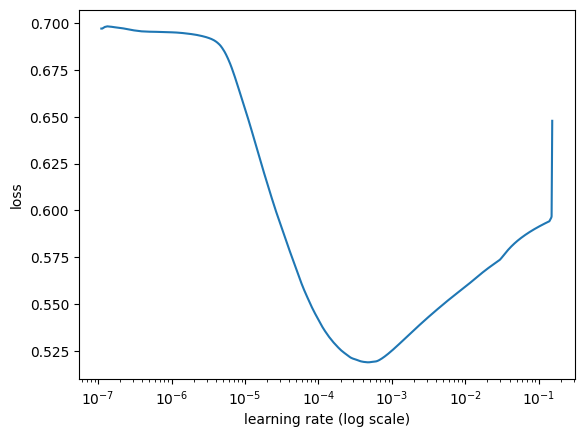

In [ ]:
learner.lr_plot()

In [ ]:
learner.fit_onecycle(2e-4, 1)



begin training using onecycle policy with max lr of 0.0002...
1563/1563 [==============================] - 1425s 904ms/step - loss: 0.4482 - accuracy: 0.8006 - val_loss: 0.6170 - val_accuracy: 0.5218


In [ ]:
learner.validate(class_names=transformer.get_classes())

782/782 [==============================] - 353s 450ms/step
              precision    recall  f1-score   support

    negative       0.51      1.00      0.68     12592
    positive       0.92      0.04      0.08     12408

    accuracy                           0.52     25000
   macro avg       0.72      0.52      0.38     25000
weighted avg       0.71      0.52      0.38     25000



array([[12548,    44],
       [11910,   498]])

In [ ]:
learner.view_top_losses(n=3, preproc=transformer)

782/782 [==============================] - 351s 449ms/step
----------
id:16298 | loss:2.19 | true:positive | pred:negative)

----------
id:16730 | loss:2.19 | true:positive | pred:negative)

----------
id:22413 | loss:2.19 | true:positive | pred:negative)



In [ ]:
X_test[3629]

"I don't think I need to tell you the story. For it has been told for years and years. So I will just share my feelings. I first saw Cinderella was when I was five years old. From then on I was a Disney child in a good way. The animation now seems childish and old fashioned, but that is part of its charm now. Now, in the age of High School Musical and computer generated images, it seems like people have forgotten the genius and magical essence of early Disney movies. Thankfully I was born before that so I was introduced to this classic. And it seems no matter how old I get, I turn back into that five year old watching it on VHS. Which is the true magic of Disney."

In [ ]:
test.x[3629]

array([[  101,  2310, 25032, ...,     0,     0,     0],
       [    1,     1,     1, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0]])

## ใช้งาน Predict

In [ ]:
predictor = ktrain.get_predictor(learner.model, transformer)
comment1 = 'this film was about politics. waste my time and money.'
comment2 = 'this film was about politics. It sucks, horrible. Can i get money back.'
comment3 = 'this film was about politics. i give 5 stars.'
comment4 = 'this film was about politics. you should watch it.'

new_reviews = [comment1, comment2, comment3, comment4]
predictor.predict(new_reviews)

['negative', 'negative', 'negative', 'negative']

In [ ]:
preds = predictor.predict(new_reviews, return_proba=True)
print(preds)

[[0.8303984  0.1696016 ]
 [0.74509954 0.2549004 ]
 [0.53842777 0.46157226]
 [0.62229234 0.3777077 ]]


In [ ]:
result = [np.argmax(p) for p in preds]
result

[0, 0, 0, 0]

In [ ]:
predictor.predict(X_test[3629])

'positive'

## การบันทึก Model และการโหลดมาใช้งาน

In [ ]:
predictor.save('my_predictor')

In [ ]:
reload_predictor = ktrain.load_predictor('my_predictor')

# Workshop 5: การใช้ Transformer กับภาษาไทย

In [ ]:
!pip install transformers
!pip install -q emoji pythainlp==2.2.4 sefr_cut tinydb seqeval sentencepiece pydantic jsonlines
!pip install --no-deps thai2transformers==0.1.2
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for thai2transformers: fil

In [ ]:
from transformers import CamembertTokenizer, AutoModelForSequenceClassification, pipeline
from thai2transformers.preprocess import process_transformers

tokenizer = CamembertTokenizer.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased', revision='main')
tokenizer.additional_special_tokens = ['<s>NOTUSED', '</s>NOTUSED', '<_>']
model = AutoModelForSequenceClassification.from_pretrained('airesearch/wangchanberta-base-att-spm-uncased', revision='finetuned@wisesight_sentiment')
classify_sequence = pipeline(task='sentiment-analysis', tokenizer=tokenizer, model=model)

input_text = "Google เปิดตัวผลิตภัณฑ์ใหม่สำหรับสมาร์ตโฮม"
processed_input_text = process_transformers(input_text)
print(processed_input_text, '\n')
print(classify_sequence(processed_input_text))

google<_>เปิดตัวผลิตภัณฑ์ใหม่สำหรับสมาร์ตโฮม 

[{'label': 'neu', 'score': 0.9830070734024048}]


In [ ]:
input_text = "ไปดูเรื่องนี้มาแล้ว ภาพ เสียงดี ไม่โอนะ"
processed_input_text = process_transformers(input_text)
print('\n', processed_input_text, '\n')
print(classify_sequence(processed_input_text))


 ไปดูเรื่องนี้มาแล้ว<_>ภาพ<_>เสียงดี<_>ไม่โอนะ 

[{'label': 'neg', 'score': 0.9078078866004944}]


In [ ]:
input_text = "ไปลองมาแล้วเมื่อวาลไม่เสียแรงที่ถ่อไปอ่ะ"
processed_input_text = process_transformers(input_text)
print('\n', processed_input_text, '\n')
print(classify_sequence(processed_input_text))


 ไปลองมาแล้วเมื่อวาลไม่เสียแรงที่ถ่อไปอ่ะ 

[{'label': 'pos', 'score': 0.780756950378418}]
